In [2]:
import os
import sys

import pandas as pd

---

In [5]:
nb_dir = '/data/parastou/RNAdeg/scripts/'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [6]:
from Util import to_log2_tpm

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from Viz import scatter_plot

---

In [9]:
out_dir = '/data/parastou/RNAdeg/plots/'

-------------

## Load pA RNA and Pol II RIP data

In [10]:
data_dir = '/data/parastou/RNAdeg/results/RipRna/xp_data/'

df = pd.read_csv(os.path.join(data_dir, 'merged_tpm.csv'), sep='\t')
df = to_log2_tpm(df)
df = df[['gene-name', 'type', 'category', 'WT_RIP', 'WT_RNA']]
df = df[(df['type']=='gene') | (df['category']=='repeat')]
df.fillna(0, inplace=True)

## Plot  gene cloud

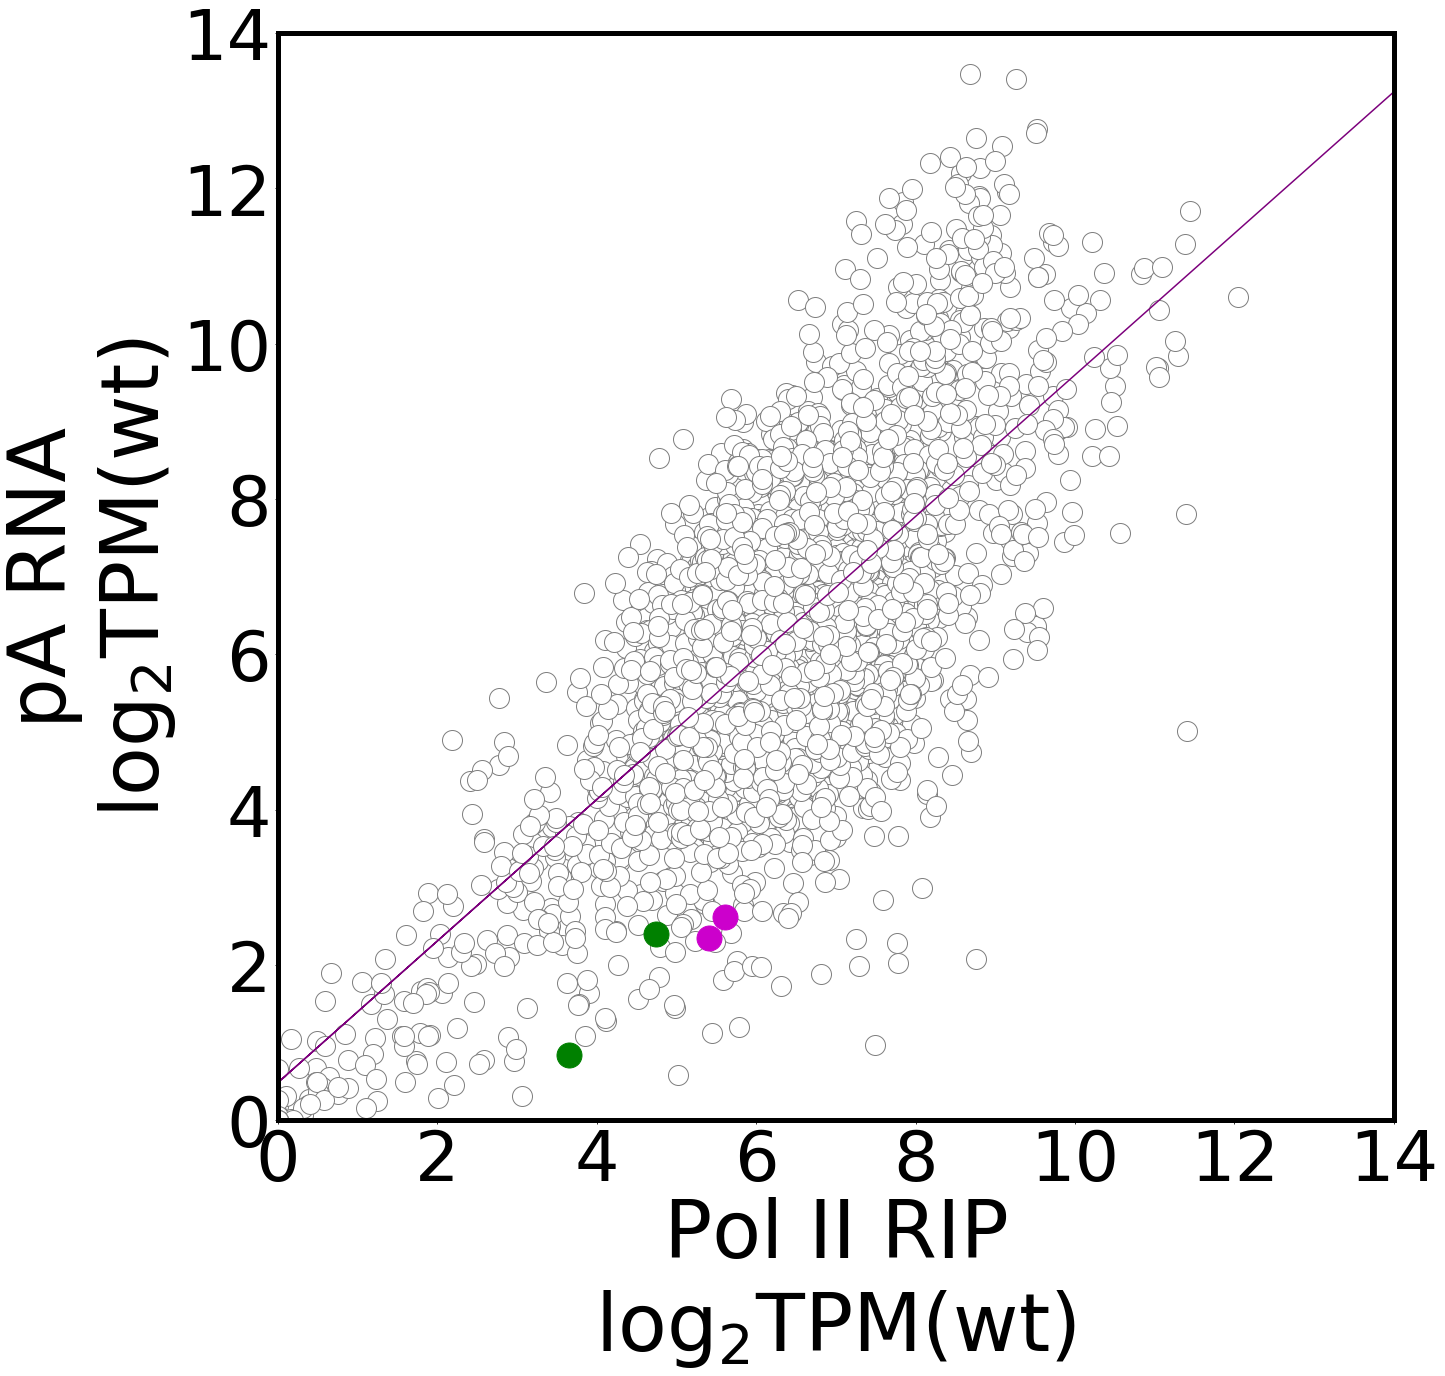

In [11]:
scatter_plot(df, 'WT_RIP', 'WT_RNA', out_dir, 'FigureS1-B.png', regressor=True, annotate=False,
            xlabel='Pol II RIP\n$\mathrm{log_2TPM(wt)}$', ylabel='pA RNA\n$\mathrm{log_2TPM(wt)}$', 
            xlim=14, ylim=14, ribo_color='dimgray')

-------------

## Load Pol II ChIP and Pol II RIP data

In [12]:
data_dir = '/data/parastou/RNAdeg/results/RipChip/xp_data/'

chip_df = pd.read_csv(os.path.join(data_dir, 'chip_pombe_tpm_merged.csv'), sep='\t')
chip_df = to_log2_tpm(chip_df)
chip_df = chip_df[['gene-name', 'type', 'category', 'WT_ChIP']]
chip_df = chip_df[(chip_df['type']=='gene') | (chip_df['category']=='repeat')]
chip_df.fillna(0, inplace=True)

In [13]:
df = pd.merge(df, chip_df, on=['gene-name', 'type', 'category'], how='outer')

## Plot  gene cloud

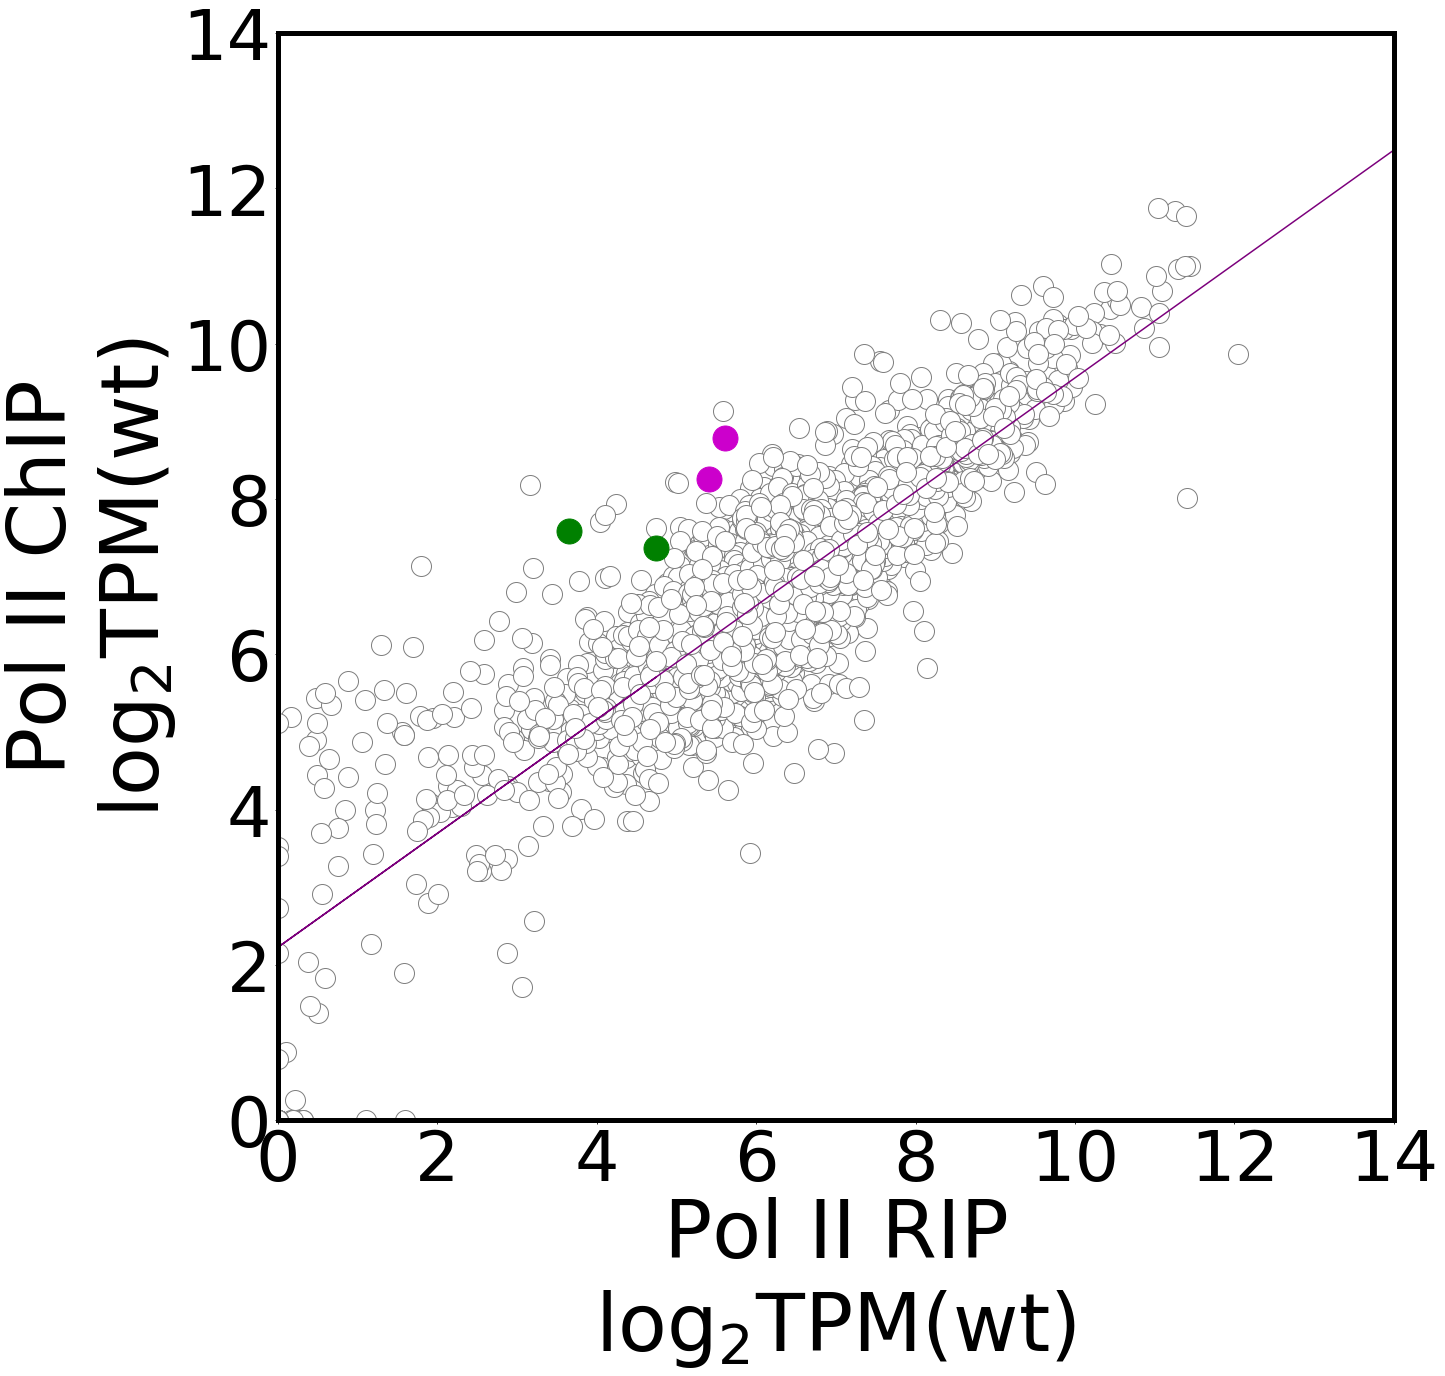

In [14]:
scatter_plot(df, 'WT_RIP', 'WT_ChIP', out_dir, 'FigureS1-A.png', regressor=True, annotate=False,
            xlabel='Pol II RIP\n$\mathrm{log_2TPM(wt)}$', ylabel='Pol II ChIP\n$\mathrm{log_2TPM(wt)}$', 
             ribo_color='dimgray', ylim=14, xlim=14)